# Checklist
ขั้นตอนทั้งหมดที่ต้องทำกับทุกตาราง
1. Name 
2. Type (Category, int/float, bounded/unbounded, text, structured, etc.)
3. % of missing values
4. Type of distribution (Gaussian, uniform, logarithmic, etc.)
5. Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)
6. Possibly useful for the task?

# คำสั่งซื้อ (Order)

### 1. ตรวจ Name

In [1]:
import pandas as pd
order = pd.read_csv('../2_data/20180319/order.csv')
order.head()

,ORDER_ID,CUSTOMER_ID,BPCODE,CREATE_DATE,UPDATE_DATE,STATUS
0,"2,024",22,1100700373,2015-10-05 21:05:45,2015-10-05 21:05:45,PENDING
1,"2,241","4,122",1100702444,2015-10-15 18:51:08,2015-10-15 19:03:44,PENDING
2,"2,321","4,223",1100702550,2015-10-16 15:36:42,2015-10-16 15:42:23,PAID_SUCCESS
3,"2,341","4,122",1100702444,2015-10-16 23:45:30,2015-10-16 23:54:33,PENDING
4,"2,422","4,527",1100702884,2015-10-17 18:35:16,2015-10-17 18:45:13,PENDING


### 2. Change data type

เปลี่ยน order_id กับ cust_id ให้เป็น int 

In [2]:
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 

new_order = order[:]
new_order['ORDER_ID'] = order['ORDER_ID'].apply(locale.atoi)
new_order['CUSTOMER_ID'] = order['CUSTOMER_ID'].apply(locale.atoi)
new_order.head()

,ORDER_ID,CUSTOMER_ID,BPCODE,CREATE_DATE,UPDATE_DATE,STATUS
0,2024,22,1100700373,2015-10-05 21:05:45,2015-10-05 21:05:45,PENDING
1,2241,4122,1100702444,2015-10-15 18:51:08,2015-10-15 19:03:44,PENDING
2,2321,4223,1100702550,2015-10-16 15:36:42,2015-10-16 15:42:23,PAID_SUCCESS
3,2341,4122,1100702444,2015-10-16 23:45:30,2015-10-16 23:54:33,PENDING
4,2422,4527,1100702884,2015-10-17 18:35:16,2015-10-17 18:45:13,PENDING


เปลี่ยน CREATE_DATE, UPDATE_DATE เป็น datetime

In [3]:
new_order['UPDATE_DATE'] = pd.to_datetime(new_order['UPDATE_DATE'])
new_order['CREATE_DATE'] = pd.to_datetime(new_order['CREATE_DATE'])

In [4]:
new_order.dtypes

ORDER_ID                int64
CUSTOMER_ID             int64
BPCODE                  int64
CREATE_DATE    datetime64[ns]
UPDATE_DATE    datetime64[ns]
STATUS                 object
dtype: object

### 3. Check % of missing value

In [5]:
new_order.isnull().sum(axis=0)

ORDER_ID       0
CUSTOMER_ID    0
BPCODE         0
CREATE_DATE    0
UPDATE_DATE    0
STATUS         0
dtype: int64

### 4. Check Type of distribution (ตรวจข้อมูลโดยการ plot อย่างง่ายๆ)

In [6]:
print('ALL',len(new_order))

ALL 11953


In [7]:
status_grouped = new_order.groupby(['STATUS'], axis=0)['ORDER_ID'].count()
status_grouped

STATUS
CANCEL                 1086
PAID_FAIL                 5
PAID_SUCCESS           4433
PENDING                6250
PENDING_TMN_CREATED     179
Name: ORDER_ID, dtype: int64

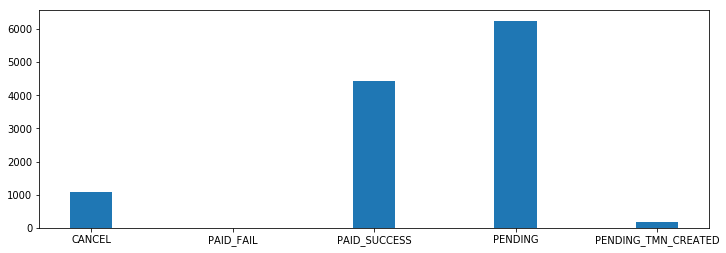

In [8]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(status_grouped.keys()))
money = status_grouped.values

fig, ax = plt.subplots(figsize=(12,4))
plt.bar(x, money, width=0.3)
plt.xticks(x, status_grouped.keys())
plt.show()

## Compare Date & time field

In [9]:
from datetime import datetime as dt
from dateutil.parser import parse

time_diff = (new_order['UPDATE_DATE']- new_order['CREATE_DATE']).astype('timedelta64[m]')
df_time_diff=pd.DataFrame(time_diff, columns=['diff_time'])
join_diff = pd.concat([new_order, df_time_diff], axis=1, join='inner')
join_diff.head()

,ORDER_ID,CUSTOMER_ID,BPCODE,CREATE_DATE,UPDATE_DATE,STATUS,diff_time
0,2024,22,1100700373,2015-10-05 21:05:45,2015-10-05 21:05:45,PENDING,0.0
1,2241,4122,1100702444,2015-10-15 18:51:08,2015-10-15 19:03:44,PENDING,12.0
2,2321,4223,1100702550,2015-10-16 15:36:42,2015-10-16 15:42:23,PAID_SUCCESS,5.0
3,2341,4122,1100702444,2015-10-16 23:45:30,2015-10-16 23:54:33,PENDING,9.0
4,2422,4527,1100702884,2015-10-17 18:35:16,2015-10-17 18:45:13,PENDING,9.0


เอาแถวที่ diff_time ติดลบออก (เนื่องจากข้อมูลที่ถูกต้อง UPDATE_DATE ต้องเกิดหลัง CREATE_DATE เสมอ)

In [10]:
time_join_filt = join_diff[join_diff.diff_time >= 0]
time_join_filt.head()

,ORDER_ID,CUSTOMER_ID,BPCODE,CREATE_DATE,UPDATE_DATE,STATUS,diff_time
0,2024,22,1100700373,2015-10-05 21:05:45,2015-10-05 21:05:45,PENDING,0.0
1,2241,4122,1100702444,2015-10-15 18:51:08,2015-10-15 19:03:44,PENDING,12.0
2,2321,4223,1100702550,2015-10-16 15:36:42,2015-10-16 15:42:23,PAID_SUCCESS,5.0
3,2341,4122,1100702444,2015-10-16 23:45:30,2015-10-16 23:54:33,PENDING,9.0
4,2422,4527,1100702884,2015-10-17 18:35:16,2015-10-17 18:45:13,PENDING,9.0


In [11]:
time_join_filt.min()

ORDER_ID                      1001
CUSTOMER_ID                     21
BPCODE                  1100316131
CREATE_DATE    2015-10-05 18:39:10
UPDATE_DATE    2015-10-05 18:39:10
STATUS                      CANCEL
diff_time                        0
dtype: object

In [12]:
time_join_filt.max()

ORDER_ID                    143382
CUSTOMER_ID                 259563
BPCODE                  1100911110
CREATE_DATE    2018-01-20 10:18:07
UPDATE_DATE    2018-01-20 10:29:28
STATUS         PENDING_TMN_CREATED
diff_time                   961314
dtype: object

In [13]:
time_cleaned = time_join_filt[(time_join_filt['CREATE_DATE'] > '2015-01-01 00:00:00') & (time_join_filt['CREATE_DATE'] < '2018-01-21 00:00:00')]
print(time_cleaned.shape)
time_cleaned.head()

(11916, 7)


,ORDER_ID,CUSTOMER_ID,BPCODE,CREATE_DATE,UPDATE_DATE,STATUS,diff_time
0,2024,22,1100700373,2015-10-05 21:05:45,2015-10-05 21:05:45,PENDING,0.0
1,2241,4122,1100702444,2015-10-15 18:51:08,2015-10-15 19:03:44,PENDING,12.0
2,2321,4223,1100702550,2015-10-16 15:36:42,2015-10-16 15:42:23,PAID_SUCCESS,5.0
3,2341,4122,1100702444,2015-10-16 23:45:30,2015-10-16 23:54:33,PENDING,9.0
4,2422,4527,1100702884,2015-10-17 18:35:16,2015-10-17 18:45:13,PENDING,9.0


In [14]:
time_cleaned.min()

ORDER_ID                      1001
CUSTOMER_ID                     21
BPCODE                  1100316131
CREATE_DATE    2015-10-05 18:39:10
UPDATE_DATE    2015-10-05 18:39:10
STATUS                      CANCEL
diff_time                        0
dtype: object

In [15]:
time_cleaned.max()

ORDER_ID                    143382
CUSTOMER_ID                 259563
BPCODE                  1100911110
CREATE_DATE    2018-01-20 10:18:07
UPDATE_DATE    2018-01-20 10:29:28
STATUS         PENDING_TMN_CREATED
diff_time                   961314
dtype: object

In [16]:
del time_cleaned['diff_time']
new_order = time_cleaned
new_order.head()

,ORDER_ID,CUSTOMER_ID,BPCODE,CREATE_DATE,UPDATE_DATE,STATUS
0,2024,22,1100700373,2015-10-05 21:05:45,2015-10-05 21:05:45,PENDING
1,2241,4122,1100702444,2015-10-15 18:51:08,2015-10-15 19:03:44,PENDING
2,2321,4223,1100702550,2015-10-16 15:36:42,2015-10-16 15:42:23,PAID_SUCCESS
3,2341,4122,1100702444,2015-10-16 23:45:30,2015-10-16 23:54:33,PENDING
4,2422,4527,1100702884,2015-10-17 18:35:16,2015-10-17 18:45:13,PENDING


In [17]:
new_order.isnull().sum()

ORDER_ID       0
CUSTOMER_ID    0
BPCODE         0
CREATE_DATE    0
UPDATE_DATE    0
STATUS         0
dtype: int64

In [18]:
new_order.dtypes

ORDER_ID                int64
CUSTOMER_ID             int64
BPCODE                  int64
CREATE_DATE    datetime64[ns]
UPDATE_DATE    datetime64[ns]
STATUS                 object
dtype: object

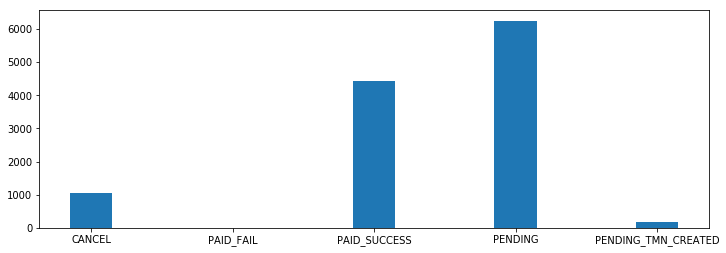

In [19]:
status_grouped = new_order.groupby(['STATUS'], axis=0)['ORDER_ID'].count()
x = np.arange(len(status_grouped.keys()))
money = status_grouped.values

fig, ax = plt.subplots(figsize=(12,4))
plt.bar(x, money, width=0.3)
plt.xticks(x, status_grouped.keys())
plt.show()

In [20]:
new_order.to_csv('../2_data/explored/order.csv', index = False)

## รายการสั่งซื้อที่มีการชำระราคาเสร็จสิ้น (Paid_Success)

In [21]:
new_order_success = new_order[new_order['STATUS'] == "PAID_SUCCESS"]
print(new_order_success.shape)
new_order_success.head()

(4425, 6)


,ORDER_ID,CUSTOMER_ID,BPCODE,CREATE_DATE,UPDATE_DATE,STATUS
2,2321,4223,1100702550,2015-10-16 15:36:42,2015-10-16 15:42:23,PAID_SUCCESS
6,2481,2509,1100605014,2015-10-18 20:50:15,2015-10-18 20:58:13,PAID_SUCCESS
10,2781,5445,1100703863,2015-10-26 11:22:23,2015-10-26 11:25:26,PAID_SUCCESS
12,3202,8263,1100561933,2015-11-01 16:44:23,2015-11-01 16:46:12,PAID_SUCCESS
20,3962,10702,1100708595,2015-11-11 10:22:41,2015-11-11 10:33:29,PAID_SUCCESS


In [22]:
new_order_success.to_csv('../2_data/prepared/order_success.csv', index = False)

## รายการสั่งซื้อที่ยกเลิก (Cancel)

In [23]:
new_order_cancel = new_order[new_order['STATUS'] == "CANCEL"]
print(new_order_cancel.shape)
new_order_cancel.head()

(1057, 6)


,ORDER_ID,CUSTOMER_ID,BPCODE,CREATE_DATE,UPDATE_DATE,STATUS
33,5341,13842,1100712196,2015-11-25 11:31:48,2017-06-20 10:54:31,CANCEL
34,5342,13842,1100712196,2015-11-25 11:31:48,2017-06-20 10:54:31,CANCEL
38,5561,13842,1100712196,2015-11-29 12:56:00,2017-06-20 10:55:13,CANCEL
427,9441,13842,1100712196,2016-01-01 20:05:27,2017-06-20 10:55:55,CANCEL
429,9481,13842,1100712196,2016-01-02 12:00:38,2017-06-20 10:55:47,CANCEL


In [24]:
new_order_cancel.to_csv('../2_data/prepared/order_cancel.csv', index =False)

## อยู่ระหว่างการทำรายการ (Pending)

In [25]:
new_order_pending = new_order[new_order['STATUS'] == "PENDING"]
print(new_order_pending.shape)
new_order_pending.head()

(6250, 6)


,ORDER_ID,CUSTOMER_ID,BPCODE,CREATE_DATE,UPDATE_DATE,STATUS
0,2024,22,1100700373,2015-10-05 21:05:45,2015-10-05 21:05:45,PENDING
1,2241,4122,1100702444,2015-10-15 18:51:08,2015-10-15 19:03:44,PENDING
3,2341,4122,1100702444,2015-10-16 23:45:30,2015-10-16 23:54:33,PENDING
4,2422,4527,1100702884,2015-10-17 18:35:16,2015-10-17 18:45:13,PENDING
5,2442,4462,1100702709,2015-10-18 15:41:07,2015-10-18 15:50:14,PENDING


In [26]:
new_order_pending.to_csv('../2_data/prepared/order_pending.csv', index =False)

# สินค้าในคำสั่งซื้อ (order_item)

In [27]:
df_order_item = pd.read_csv('../2_data/20180319/order_item.csv')
df_order_item.head()

,ORDER_ID,ORDER_ITEM_ID,MATNR,QUANTITY,TOTAL_PRICE
0,"2,024","2,024",19106665,1,"2,700"
1,"2,024","2,025",19049635,1,"36,900"
2,"2,241","2,221",19086648,1,"6,900"
3,"2,321","2,281",19110489,1,"7,900"
4,"2,341","2,301",19086648,1,"6,900"


ตรวจสอบ format type

In [28]:
df_order_item.dtypes

ORDER_ID         object
ORDER_ITEM_ID    object
MATNR             int64
QUANTITY         object
TOTAL_PRICE      object
dtype: object

เปลี่ยน format ID ให้เป็น int ให้หมด ส่วน TOTAL_PRICE ให้เป็น Float

In [29]:
import locale
from locale import atof
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 
locale.setlocale(locale.LC_NUMERIC, '')

new_order_item = df_order_item[:]
new_order_item['ORDER_ID'] = df_order_item['ORDER_ID'].apply(locale.atoi)
new_order_item['ORDER_ITEM_ID'] = df_order_item['ORDER_ITEM_ID'].apply(locale.atoi)
new_order_item['MATNR'] = df_order_item['MATNR'].apply(int)
new_order_item['QUANTITY'] = df_order_item['QUANTITY'].apply(locale.atoi)
new_order_item['TOTAL_PRICE'] = df_order_item['TOTAL_PRICE'].apply(atof)
print(new_order_item.shape)
new_order_item.head()

(17448, 5)


,ORDER_ID,ORDER_ITEM_ID,MATNR,QUANTITY,TOTAL_PRICE
0,2024,2024,19106665,1,2700.0
1,2024,2025,19049635,1,36900.0
2,2241,2221,19086648,1,6900.0
3,2321,2281,19110489,1,7900.0
4,2341,2301,19086648,1,6900.0


### 4. Check type of distribution

เริ่มจาก Quantity

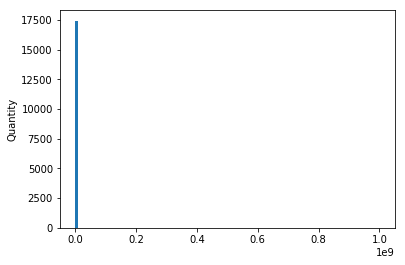

In [30]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = new_order_item['QUANTITY']
plt.hist(x, bins=100)
plt.ylabel('Quantity');

ส่วนตัวคิดว่า distribution ของ Quantity น่าจะเป็นแบบ poisson distribution กล่างคือจะมีค่ามากที่ จำนวนน้อยๆ

แล้วจะเห็นว่าค่าส่วนมากอยู่แถวๆ 1 แต่ค่ามากสุดก็สูงมาก ดังนั้นลอง group ดู

In [31]:
new_order_item.groupby('QUANTITY')['ORDER_ID'].count()

QUANTITY
1            15757
2             1210
3              150
4              190
5               20
6               58
7                5
8               24
9                2
10               8
11               1
12               5
15               3
18               4
20               1
21               1
24               2
28               1
30               1
50               1
100              1
162              1
1558             1
999999998        1
Name: ORDER_ID, dtype: int64

จะเห็นว่ามีแถวหนึ่งที่ค่าเป็น 999999998 ตัดค่านี้ทิ้งเลย จะได้

In [32]:
new_order_item = new_order_item[new_order_item['QUANTITY'] < 9999999]
new_order_item.groupby('QUANTITY')['ORDER_ID'].count()

QUANTITY
1       15757
2        1210
3         150
4         190
5          20
6          58
7           5
8          24
9           2
10          8
11          1
12          5
15          3
18          4
20          1
21          1
24          2
28          1
30          1
50          1
100         1
162         1
1558        1
Name: ORDER_ID, dtype: int64

ดู distribution ใหม่ จะได้

Text(0,0.5,'Quantity')

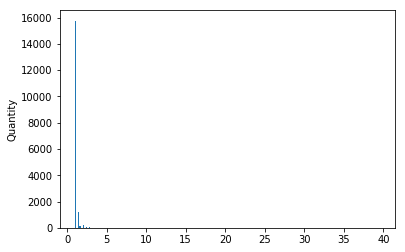

In [33]:
plt.hist(np.sqrt(new_order_item['QUANTITY']), bins=200)
plt.ylabel('Quantity')

# Anomaly Detection Algorithm

- Model normal, then find anomalies
- t-digest for adaptive threshold
- Probabilistic models for complex patterns

เราจะถือว่าค่า x ไม่ปกติ (anomaly) เมื่อ $p(x) < \epsilon$

### Normal Distribution

สำหรับ normal distribution $p(x)$ หาได้จาก

$$ p(x) = \prod_{j=1}^{n}p(x_{j};\mu_j,\sigma_j^2) = \prod_{j=1}^{n}\frac{1}{\sqrt{2\pi}\sigma_j}exp(-\frac{(x_j-\mu_j)^2}{2\sigma_j^2})$$

เมื่อ $x_j$ คือ feature vector ตัวที่ $j$ ซึ่งจะมีค่าเฉลี่ยเป็น $\mu_j$ และความแปรปรวนคือ $\sigma_j^2$

$$\mu_j = \frac{1}{m}\sum_{i=1}^{m}x_{j}^{(i)}$$

$$\sigma_j^2 = \frac{1}{m}\sum_{i=1}^{m}(x_{j}^{(i)}-\mu_j)^2$$

### Poisson Distribution

สำหรับ Poisson distribution มี probability mass function คือ $p(x)$ ดังนี้

$$ p(x) = \prod_{j=1}^{n}p(x_{j};\lambda_j) = \prod_{j=1}^{n}\frac{e^{-\lambda_j}\lambda^{x_j}}{x_j!}$$

Parameter Estimation : The maximum likelihood estimator of $\lambda$ is 

$$\bar{\lambda} = \bar{X}$$

จาก ข้อมูล Quantity ของเราเมื่อหาค่า parameter $\lambda$ แล้วลอง plot ดูจะได้

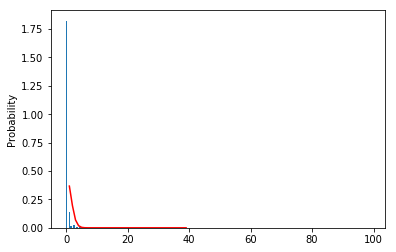

In [34]:
from scipy.stats import poisson
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np

# Engineering feature
x_en_featured = np.sqrt(new_order_item['QUANTITY'])
qt_lamb = np.mean(x_en_featured)
x_scaled = preprocessing.scale(x_en_featured)

# X range for plot
x_poisson = np.arange(min(x_en_featured),max(x_en_featured),1)
y_poisson = poisson.pmf(x_poisson,qt_lamb)
plt.plot(x_poisson, y_poisson, 'r-')
plt.hist(x_scaled, bins=200, normed=True)
plt.ylabel('Probability');
plt.show()

เราจะเอาค่า 99.99% ดังนั้นเราต้องตัดค่าที่ $p(x) < 0.0001$

In [35]:
def poissonAnomalyDetection(xj):
    lamb = np.mean(xj)
    xj_scaled = preprocessing.scale(x_en_featured)
    x_poisson = np.arange(min(xj),max(xj),1)
    y_poisson = poisson.pmf(x_poisson,lamb)
    return x_poisson[y_poisson > 0.0001]

In [36]:
poissonAnomalyDetection(np.sqrt(new_order_item['QUANTITY']))

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.])

เมื่อดูในเว็บ SB พบว่าสินค้าที่มีราคาถูกสุดอยู่ที่ 38 บาท ดังนั้นจะใช้มันเป็น minimum price จะได้

In [37]:
b_new_order_item = new_order_item.loc[new_order_item['TOTAL_PRICE'] >= 38]
print(b_new_order_item.shape)
b_new_order_item.head()

(17359, 5)


,ORDER_ID,ORDER_ITEM_ID,MATNR,QUANTITY,TOTAL_PRICE
0,2024,2024,19106665,1,2700.0
1,2024,2025,19049635,1,36900.0
2,2241,2221,19086648,1,6900.0
3,2321,2281,19110489,1,7900.0
4,2341,2301,19086648,1,6900.0


In [38]:
b_new_order_item.min()

ORDER_ID             1001.0
ORDER_ITEM_ID        1001.0
MATNR            19000158.0
QUANTITY                1.0
TOTAL_PRICE            39.0
dtype: float64

Export file order_item

In [39]:
b_new_order_item.to_csv('../2_data/explored/order_item.csv', index =False)

ถึงตรงนี้

# รวมตารางคำสั่งสินค้า + รหัสสินค้า

In [40]:
left = new_order
left.head()

,ORDER_ID,CUSTOMER_ID,BPCODE,CREATE_DATE,UPDATE_DATE,STATUS
0,2024,22,1100700373,2015-10-05 21:05:45,2015-10-05 21:05:45,PENDING
1,2241,4122,1100702444,2015-10-15 18:51:08,2015-10-15 19:03:44,PENDING
2,2321,4223,1100702550,2015-10-16 15:36:42,2015-10-16 15:42:23,PAID_SUCCESS
3,2341,4122,1100702444,2015-10-16 23:45:30,2015-10-16 23:54:33,PENDING
4,2422,4527,1100702884,2015-10-17 18:35:16,2015-10-17 18:45:13,PENDING


In [41]:
right = b_new_order_item
right.head()

,ORDER_ID,ORDER_ITEM_ID,MATNR,QUANTITY,TOTAL_PRICE
0,2024,2024,19106665,1,2700.0
1,2024,2025,19049635,1,36900.0
2,2241,2221,19086648,1,6900.0
3,2321,2281,19110489,1,7900.0
4,2341,2301,19086648,1,6900.0


In [42]:
order_item_merge = pd.merge(left, right, on='ORDER_ID')
order_item_merge.head()

,ORDER_ID,CUSTOMER_ID,BPCODE,CREATE_DATE,UPDATE_DATE,STATUS,ORDER_ITEM_ID,MATNR,QUANTITY,TOTAL_PRICE
0,2024,22,1100700373,2015-10-05 21:05:45,2015-10-05 21:05:45,PENDING,2024,19106665,1,2700.0
1,2024,22,1100700373,2015-10-05 21:05:45,2015-10-05 21:05:45,PENDING,2025,19049635,1,36900.0
2,2241,4122,1100702444,2015-10-15 18:51:08,2015-10-15 19:03:44,PENDING,2221,19086648,1,6900.0
3,2321,4223,1100702550,2015-10-16 15:36:42,2015-10-16 15:42:23,PAID_SUCCESS,2281,19110489,1,7900.0
4,2341,4122,1100702444,2015-10-16 23:45:30,2015-10-16 23:54:33,PENDING,2301,19086648,1,6900.0


In [43]:
order_item_merge.isnull().sum(axis=0)

ORDER_ID         0
CUSTOMER_ID      0
BPCODE           0
CREATE_DATE      0
UPDATE_DATE      0
STATUS           0
ORDER_ITEM_ID    0
MATNR            0
QUANTITY         0
TOTAL_PRICE      0
dtype: int64

In [44]:
order_item_merge.dtypes

ORDER_ID                  int64
CUSTOMER_ID               int64
BPCODE                    int64
CREATE_DATE      datetime64[ns]
UPDATE_DATE      datetime64[ns]
STATUS                   object
ORDER_ITEM_ID             int64
MATNR                     int64
QUANTITY                  int64
TOTAL_PRICE             float64
dtype: object

### Export file  

In [45]:
order_item_merge.to_csv('../2_data/prepared/order_item_merge.csv', index=False)